In [ ]:
!pip install openai

In [ ]:
!pip install youtube-transcript-api

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.1/485.1 kB 10.1 MB/s eta 0:00:00


In [ ]:
!pip uninstall -y youtube-transcript-api

Found existing installation: youtube-transcript-api 1.2.3
Uninstalling youtube-transcript-api-1.2.3:
  Successfully uninstalled youtube-transcript-api-1.2.3


In [ ]:
!pip install youtube-transcript-api --upgrade


  Using cached youtube_transcript_api-1.2.3-py3-none-any.whl.metadata (24 kB)
Using cached youtube_transcript_api-1.2.3-py3-none-any.whl (485 kB)


In [ ]:
import requests
from google.colab import userdata

HF_TOKEN = userdata.get('HF_TOKEN')

# Define the API endpoint for summarization
#API_URL = "https://api-inference.huggingface.co/models/facebook/bart-large-cnn"

headers = {"Authorization": f"Bearer {HF_TOKEN}"}

VIDEOID = 'i-txsBoTJtI'
GOOGLE_APIKEY = userdata.get('YT_APIKEY')

# FETCHING YOUTUBE VIDEO COMMENTS

In [ ]:
from googleapiclient.discovery import build

# Function to get YouTube comments
def get_comments(video_id, api_key):
    youtube = build('youtube', 'v3', developerKey=api_key)
    comments = []
    response = youtube.commentThreads().list(
        part="snippet",
        videoId=video_id,
        textFormat="plainText",
        maxResults=100
    ).execute()

    while response:
        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
            comments.append(comment)

        if 'nextPageToken' in response:
            response = youtube.commentThreads().list(
                part="snippet",
                videoId=video_id,
                pageToken=response['nextPageToken'],
                maxResults=100
            ).execute()
        else:
            break

    return comments

video_comments = get_comments(VIDEOID, GOOGLE_APIKEY)
print(video_comments)

["If you're serious about AI, and want to learn how to build Agents, join my community: https://www.skool.com/new-society", 'im gonna delete this becaouse api keys are confidential... jo bro is that a smartass joke that i didnt get?', 'its not installing pip :(', 'Damn bro @8:26 128GB ram, nice, looks like YT is actually paying off, show us the hoops.', 'Please always share code also', 'Guys and Girls only US users can be able to used LlaMa ok other even with VPN still cannot access 🤔', 'My friend, you lost me half way though.  I am interested contact me.', 'please share code by the link', 'Bro got into a fist fight before making this video 😄', 'well when you move from local to API mid video then you make it look like a bad case of ADHD', 'can you provide a source code ?', 'aku tidak punya komputer dn laptop yang aku punya OPPO', 'Big Dawg, 2 questions.\nIf a local ollama 3 model runs slow , can I use an API to run it faster?\nIf so how much is it?', 'M hello I had an idea for automati

In [ ]:
!pip install transformers --quiet

from transformers import pipeline


In [ ]:
!pip install langchain langchain-community langchain-huggingface transformers matplotlib wordcloud --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


# SENTIMENT ANALYSIS

In [ ]:
import os

HF_TOKEN = "PASTE YOUR HUGGING FACE TOKEN HERE"
os.environ["HUGGINGFACEHUB_API_TOKEN"] = HF_TOKEN

In [ ]:
from transformers import pipeline
from langchain_community.llms import HuggingFacePipeline

# Create a transformers pipeline
generator = pipeline(
    "text2text-generation",
    model="google/flan-t5-base",
    max_length=128
)

llm = HuggingFacePipeline(pipeline=generator)

print(llm("Classify the sentiment of this comment: I love this video!"))


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

Device set to use cpu
/tmp/ipython-input-500906801.py:12: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFacePipeline``.
  llm = HuggingFacePipeline(pipeline=generator)
/tmp/ipython-input-500906801.py:15: LangChainDeprecationWarning: The method `BaseLLM.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  print(llm("Classify the sentiment of this comment: I love this video!"))


positive


In [ ]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

#Sentiment Analysis
sentiment_prompt = PromptTemplate(
    input_variables=["comment"],
    template="Classify the sentiment of this YouTube comment as Positive, Negative, or Neutral:\n\nComment: {comment}\n\nSentiment:"
)
sentiment_chain = LLMChain(llm=llm, prompt=sentiment_prompt)

print("Sentiment:", sentiment_chain.run("This video is boring..."))


#Toxicity Detection
toxicity_prompt = PromptTemplate(
    input_variables=["comment"],
    template="Classify whether this YouTube comment is Toxic or Non-toxic:\n\nComment: {comment}\n\nToxicity:"
)
toxicity_chain = LLMChain(llm=llm, prompt=toxicity_prompt)

print("Toxicity:", toxicity_chain.run("You are stupid!"))


#Keyword Extraction
keyword_prompt = PromptTemplate(
    input_variables=["comment"],
    template="Extract 3 important keywords from this YouTube comment:\n\nComment: {comment}\n\nKeywords:"
)
keyword_chain = LLMChain(llm=llm, prompt=keyword_prompt)

print("Keywords:", keyword_chain.run("this video is worst!"))


Sentiment: Negative
Toxicity: Toxic
Keywords: comment, video, worst


In [ ]:
from transformers import pipeline
from langchain_community.llms import HuggingFacePipeline
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
import pandas as pd

generator = pipeline(
    "text2text-generation",
    model="google/flan-t5-base",
    max_length=128
)

llm = HuggingFacePipeline(pipeline=generator)

sentiment_prompt = PromptTemplate(
    input_variables=["comment"],
    template="Classify the sentiment of this YouTube comment as Positive, Negative, or Neutral:\n\nComment: {comment}\n\nSentiment:"
)
sentiment_chain = LLMChain(llm=llm, prompt=sentiment_prompt)

toxicity_prompt = PromptTemplate(
    input_variables=["comment"],
    template="Classify whether this YouTube comment is Toxic or Non-toxic:\n\nComment: {comment}\n\nToxicity:"
)
toxicity_chain = LLMChain(llm=llm, prompt=toxicity_prompt)

keyword_prompt = PromptTemplate(
    input_variables=["comment"],
    template="Extract 3 important keywords from this YouTube comment:\n\nComment: {comment}\n\nKeywords:"
)
keyword_chain = LLMChain(llm=llm, prompt=keyword_prompt)

results = []
for c in video_comments[:20]:
    sentiment = sentiment_chain.run(c).strip()
    toxicity = toxicity_chain.run(c).strip()
    keywords = keyword_chain.run(c).strip()

    results.append({
        "comment": c,
        "sentiment": sentiment,
        "toxicity": toxicity,
        "keywords": keywords
    })

df = pd.DataFrame(results)
print(df.head())


Device set to use cpu


                                             comment sentiment   toxicity  \
0  If you're serious about AI, and want to learn ...  Positive  Non-toxic   
1  im gonna delete this becaouse api keys are con...  Positive  Non-toxic   
2                          its not installing pip :(  Negative  Non-toxic   
3  Damn bro @8:26 128GB ram, nice, looks like YT ...  Positive      Toxic   
4                      Please always share code also  Positive  Non-toxic   

                 keywords  
0  build, community, join  
1       comment, api, key  
2   comment, install, pip  
3  comment, ram, look, yt  
4    comment, code, share  


In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Join all comments into one text (you can also limit length if too long)
all_comments_text = " ".join(df["comment"].tolist())

# Summarize comments
summary = summarizer(all_comments_text, max_length=150, min_length=50, do_sample=False)

print("=== Summary of YouTube Comments ===")
print(summary[0]['summary_text'])


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


=== Summary of YouTube Comments ===
If you're serious about AI, and want to learn how to build Agents, join my community: https://www.skool.com/new-society. Please always share code also Guys and Girls only US users can be able to used LlaMa ok other even with VPN still cannot access.


# SUMMARIZING COMMENTS

In [ ]:
batch_size = len(video_comments) // 3
batches = [video_comments[i:i+batch_size] for i in range(0, len(video_comments), batch_size)]

for i, batch in enumerate(batches):
    print(f"\nBatch {i+1} ({len(batch)} comments):")
    print(batch[:5])  


Batch 1 (52 comments):
["If you're serious about AI, and want to learn how to build Agents, join my community: https://www.skool.com/new-society", 'im gonna delete this becaouse api keys are confidential... jo bro is that a smartass joke that i didnt get?', 'its not installing pip :(', 'Damn bro @8:26 128GB ram, nice, looks like YT is actually paying off, show us the hoops.', 'Please always share code also']

Batch 2 (52 comments):
['A non coder cannot install this from the instruction given. pointless, unless you want to unload £77.', "Hi may I know how did you get the auto suggest prompt when you are typing your goal? Mine doesn't seem to have them :')", 'how can i build an ai agent to work on Canva?', '0:05 "even if you have a bad computer"\n8:25 "look at the activity monitor" -> +20G in memory 😂', 'I am looking to create a local ai tool that will help me reword and spell and grammar check in UK brittish lanagugae that will run locally Windows?']

Batch 3 (52 comments):
['Hey broth

In [ ]:
from transformers import pipeline
import re

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

def clean_text(text):
    """Clean unwanted HTML characters and symbols."""
    text = re.sub(r'&#\d+;|&[a-z]+;', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def safe_summarize(text):
    """Safely summarize even if text is short, long, or dirty."""
    text = clean_text(text)
    if not text or len(text) < 50:
        return "Not enough meaningful content to summarize."

    max_chunk = 3500
    chunks = [text[i:i + max_chunk] for i in range(0, len(text), max_chunk)]

    summaries = []
    for idx, chunk in enumerate(chunks):
        try:
            summary = summarizer(
                chunk,
                max_length=80,
                min_length=30,
                do_sample=False,
                truncation=True
            )
            summaries.append(summary[0]['summary_text'])
        except Exception as e:
            print(f" Error summarizing chunk {idx+1}: {e}")

            if len(chunk) > 60:
                summaries.append(chunk[:120] + "...")
            else:
                summaries.append("Skipped due to short or corrupted text.")

    return " ".join(summaries)


for i, batch in enumerate(batches, start=1):
    if not batch:
        print(f"\n Summary of Batch {i}: No comments in this batch.")
        continue

    text = " ".join(batch)
    print(f"\n Summary of Batch {i}:")
    print(safe_summarize(text))


Device set to use cpu
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.



🔹 Summary of Batch 1:
This video explains how to build AI Agents using Llama 3. It also shows how to use the Gro API for better performance. The video was produced by crewai.com. I appreciate the clean simple video. I didn't run into the same issues as you with Llama 3 though. Still it gave me enough to get my head around this though. These LLM's are seriously over hyped and far from "intelligence' they jus somehow poorly mimicking intelligence.

🔹 Summary of Batch 2:
A non coder cannot install this from the instruction given. pointless, unless you want to unload £77. I am looking to create a local ai tool that will help me reword and spell and grammar check in UK brittish lanagugae that will run locally Windows. How have you set your VS Code preferences so that the longer length strings you've written for the classifier and responder classes (specifically, the strings stored in 'goal' and 'backstory') when they reach the edge of the editor window they wrap to the next line down. It's

In [ ]:
from transformers import pipeline
import html

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

summaries = []

def clean_text(text):
    """Clean and sanitize text before summarizing."""
    text = html.unescape(text)  # decode &amp; and &#39
    return text.replace("\n", " ").strip()

for i, batch in enumerate(batches, start=1):
    text = " ".join(batch)
    text = clean_text(text)

    if not text or len(text.split()) < 50:
        print(f" Skipping Batch {i}: Not enough content to summarize.")
        summaries.append("Not enough content to summarize.")
        continue

    try:
        # If the text is too long, split into smaller chunks
        max_chunk = 4000
        chunks = [text[j:j + max_chunk] for j in range(0, len(text), max_chunk)]

        batch_summary = []
        for chunk in chunks:
            try:
                summary = summarizer(chunk, max_length=80, min_length=30, do_sample=False)
                batch_summary.append(summary[0]['summary_text'])
            except Exception as e:
                print(f"⚠️ Error summarizing part of Batch {i}: {e}")
                batch_summary.append("Error in this part.")

        summaries.append(" ".join(batch_summary))
    except Exception as e:
        print(f" Error summarizing Batch {i}: {e}")
        summaries.append("Error in summarization.")

print("\n Final Insights")
for i, s in enumerate(summaries, 1):
    print(f"Batch {i} Summary: {s}")


Device set to use cpu



--- Final Insights ---
Batch 1 Summary: This video explains how to build AI agents using Llama3. It also shows how to use the Gro API for better performance. The video was produced by the crew at New Society Society. I appreciate the clean simple video.  I didn't run into the same issues as you with Llama 3 though. Still it gave me enough to get my head around this though. Im working with chat GPT4 in manual mode to do programming in python, let say it is base metric what this systems can do nowadays.
Batch 2 Summary: A non coder cannot install this from the instruction given. pointless, unless you want to unload £77. I am looking to create a local ai tool that will help me reword and spell and grammar check in UK brittish lanagugae that will run locally Windows. The same CrewAI code works great with OpenAI and Anthropic models. Llama 3 8B on ollama or LM Studio, it is much dumber than on OpenRouter. Even with the full non-quantized 8-bit version on LM studio. How to self host llama 3

In [ ]:
overall_text = " ".join(summaries)
final_summary = summarizer(overall_text, max_length=100, min_length=40, do_sample=False)

print("\nOverall Viewer Engagement Insight:")
print(final_summary[0]['summary_text'])



Overall Viewer Engagement Insight:
This video explains how to build AI agents using Llama3. It also shows how to use the Gro API for better performance. The video was produced by the crew at New Society Society. The same CrewAI code works great with OpenAI and Anthropic models.


## VISUALIZATION

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


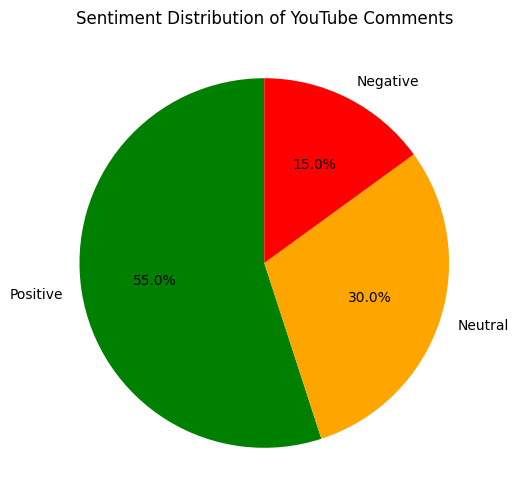

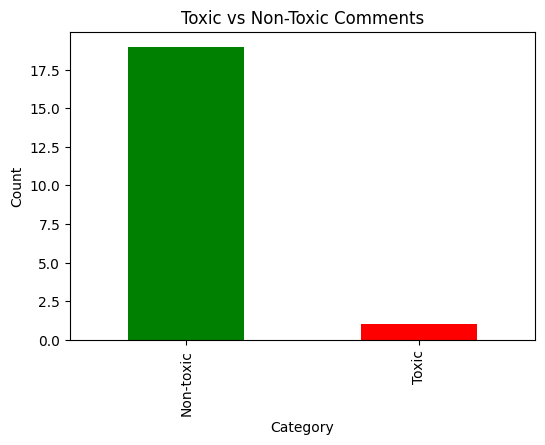

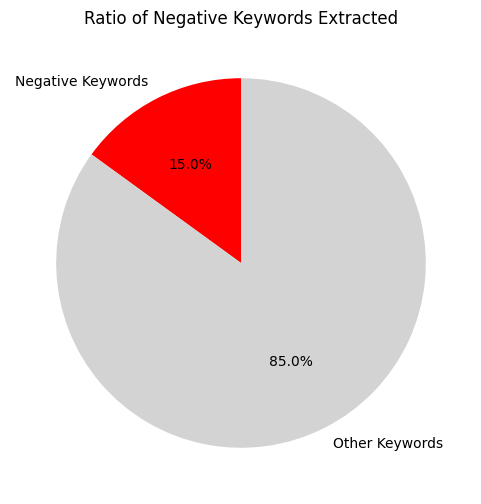

In [ ]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

plt.figure(figsize=(6,6))
sentiment_counts = df["sentiment"].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90,
        colors=['green', 'orange', 'red'])
plt.title("Sentiment Distribution of YouTube Comments")
plt.show()

plt.figure(figsize=(6,4))
toxicity_counts = df["toxicity"].value_counts()
toxicity_counts.plot(kind="bar", color=["green","red"])
plt.title("Toxic vs Non-Toxic Comments")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


negative_keywords_count = df[df["sentiment"].str.contains("negative", case=False, na=False)]["keywords"].count()
total_keywords_count = df["keywords"].count()
other_keywords_count = total_keywords_count - negative_keywords_count


labels = ["Negative Keywords", "Other Keywords"]
sizes = [negative_keywords_count, other_keywords_count]
colors = ["red", "lightgray"]


plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Ratio of Negative Keywords Extracted")
plt.show()
